In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
#Adding header names
header_names = ['Animal_name', 'Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne'
               , 'Aquatic', 'Predetor', 'Toothed', 'Backbone', 'Breathes', 'Venemous' ,
               'Fins', 'Legs_Num', 'Tail', 'Domestic', 'Catsize', 'Type']

In [3]:
# df = pd.read_table('C:/Users/Lydia Afiqah/Desktop/School/Year 3 Sem 1/CZ4032 - Data Analytics & Mining/Data-Mining-Analytics/datasets/zoo.data', sep = ',')
df = pd.read_table('../datasets/zoo.data', sep = ',', header = None, names = header_names)
df.head()

,Animal_name,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predetor,Toothed,Backbone,Breathes,Venemous,Fins,Legs_Num,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
Animal_name    101 non-null object
Hair           101 non-null int64
Feathers       101 non-null int64
Eggs           101 non-null int64
Milk           101 non-null int64
Airborne       101 non-null int64
Aquatic        101 non-null int64
Predetor       101 non-null int64
Toothed        101 non-null int64
Backbone       101 non-null int64
Breathes       101 non-null int64
Venemous       101 non-null int64
Fins           101 non-null int64
Legs_Num       101 non-null int64
Tail           101 non-null int64
Domestic       101 non-null int64
Catsize        101 non-null int64
Type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#Check for missing values
df.isnull().sum()

Animal_name    0
Hair           0
Feathers       0
Eggs           0
Milk           0
Airborne       0
Aquatic        0
Predetor       0
Toothed        0
Backbone       0
Breathes       0
Venemous       0
Fins           0
Legs_Num       0
Tail           0
Domestic       0
Catsize        0
Type           0
dtype: int64

In [6]:
# Drop Animal_name
# ML algorithms use math so we do not need string variables(animal names)
data = df.copy()
data.drop("Animal_name",axis = 1,inplace = True)

In [7]:
x = data.drop("Type",axis = 1)# input data
y = data.Type.values# target data

In [8]:
x.shape,y.shape

((101, 16), (101,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (60, 16)
Shape of X_test=> (41, 16)
Shape of y_train=> (60,)
Shape of y_test=> (41,)


## Decision Tree Classifier

In [10]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  0.9512195121951219
Train Accurary :  1.0


In [11]:
y_pred_tree

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 5, 5,
       5, 7, 1, 7, 6, 7, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7],
      dtype=int64)

In [12]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  5]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.80      0.89         5
           7       0.83      1.00      0.91         5

    accuracy                           0.95        41
   macro avg       0.93      0.90      0.89        41
weighted avg       0.96      0.95      0.95        41



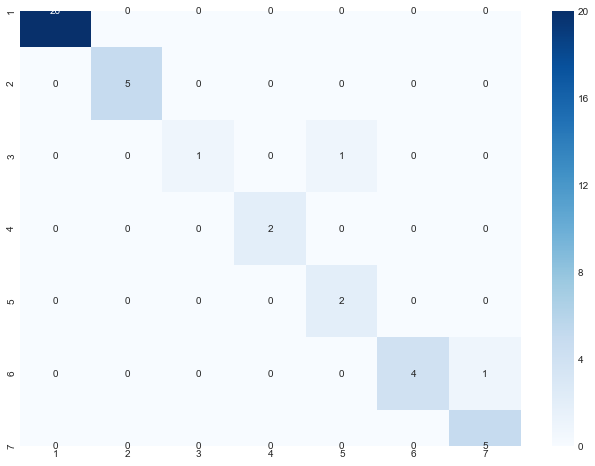

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Blues")
plt.show()

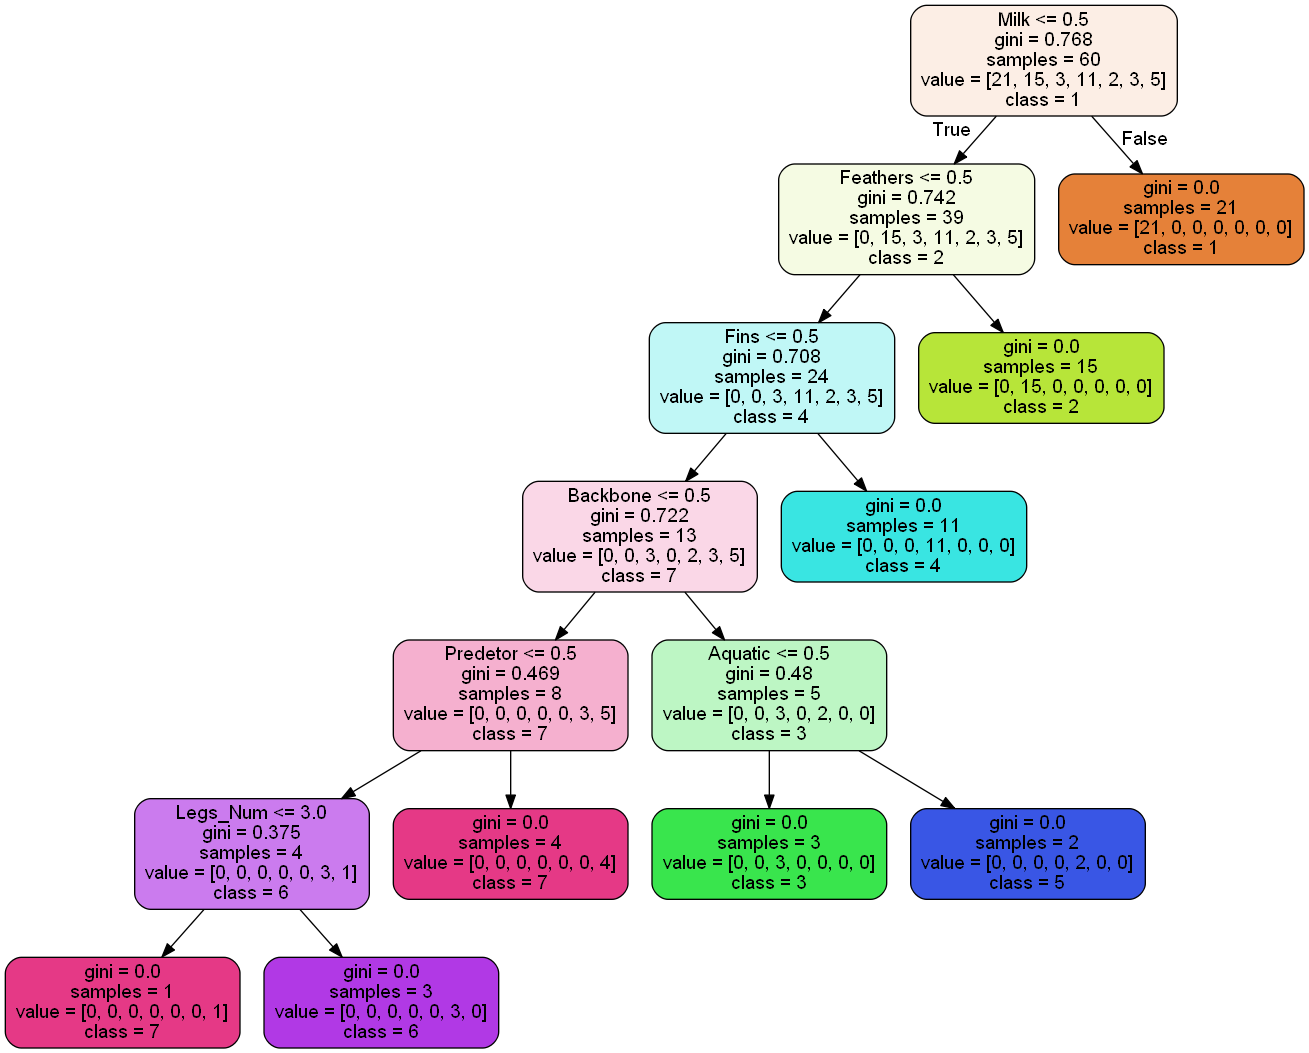

In [14]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=['Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne'
               , 'Aquatic', 'Predetor', 'Toothed', 'Backbone', 'Breathes', 'Venemous' ,
               'Fins', 'Legs_Num', 'Tail', 'Domestic', 'Catsize'],
                          class_names=["1","2","3","4","5","6","7"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [15]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

# plt.figure(figsize = (10,8))
# plt.plot(range(1,X_train.shape[0]+1),rf_test_score_list,label = "test")
# plt.plot(range(1,X_train.shape[0]+1),rf_train_score_list,label = "train")
# plt.legend()
# plt.xlabel("n estimators")
# plt.ylabel("Scores")
# plt.show()

Best Score =  0.9512195121951219
Best n_estimators =  60


In [16]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
y_pred_rf

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7],
      dtype=int64)

In [18]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0  4]]
classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5

    accuracy                           0.95        41
   macro avg       0.95      0.90      0.90        41
weighted avg       0.96      0.95      0.95        41



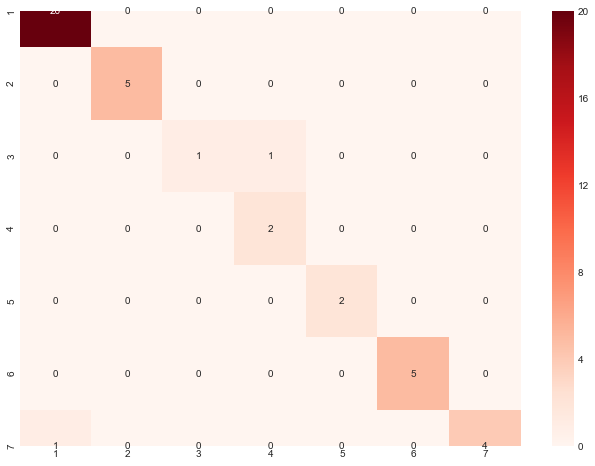

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8),cmap = "Reds")
plt.show()

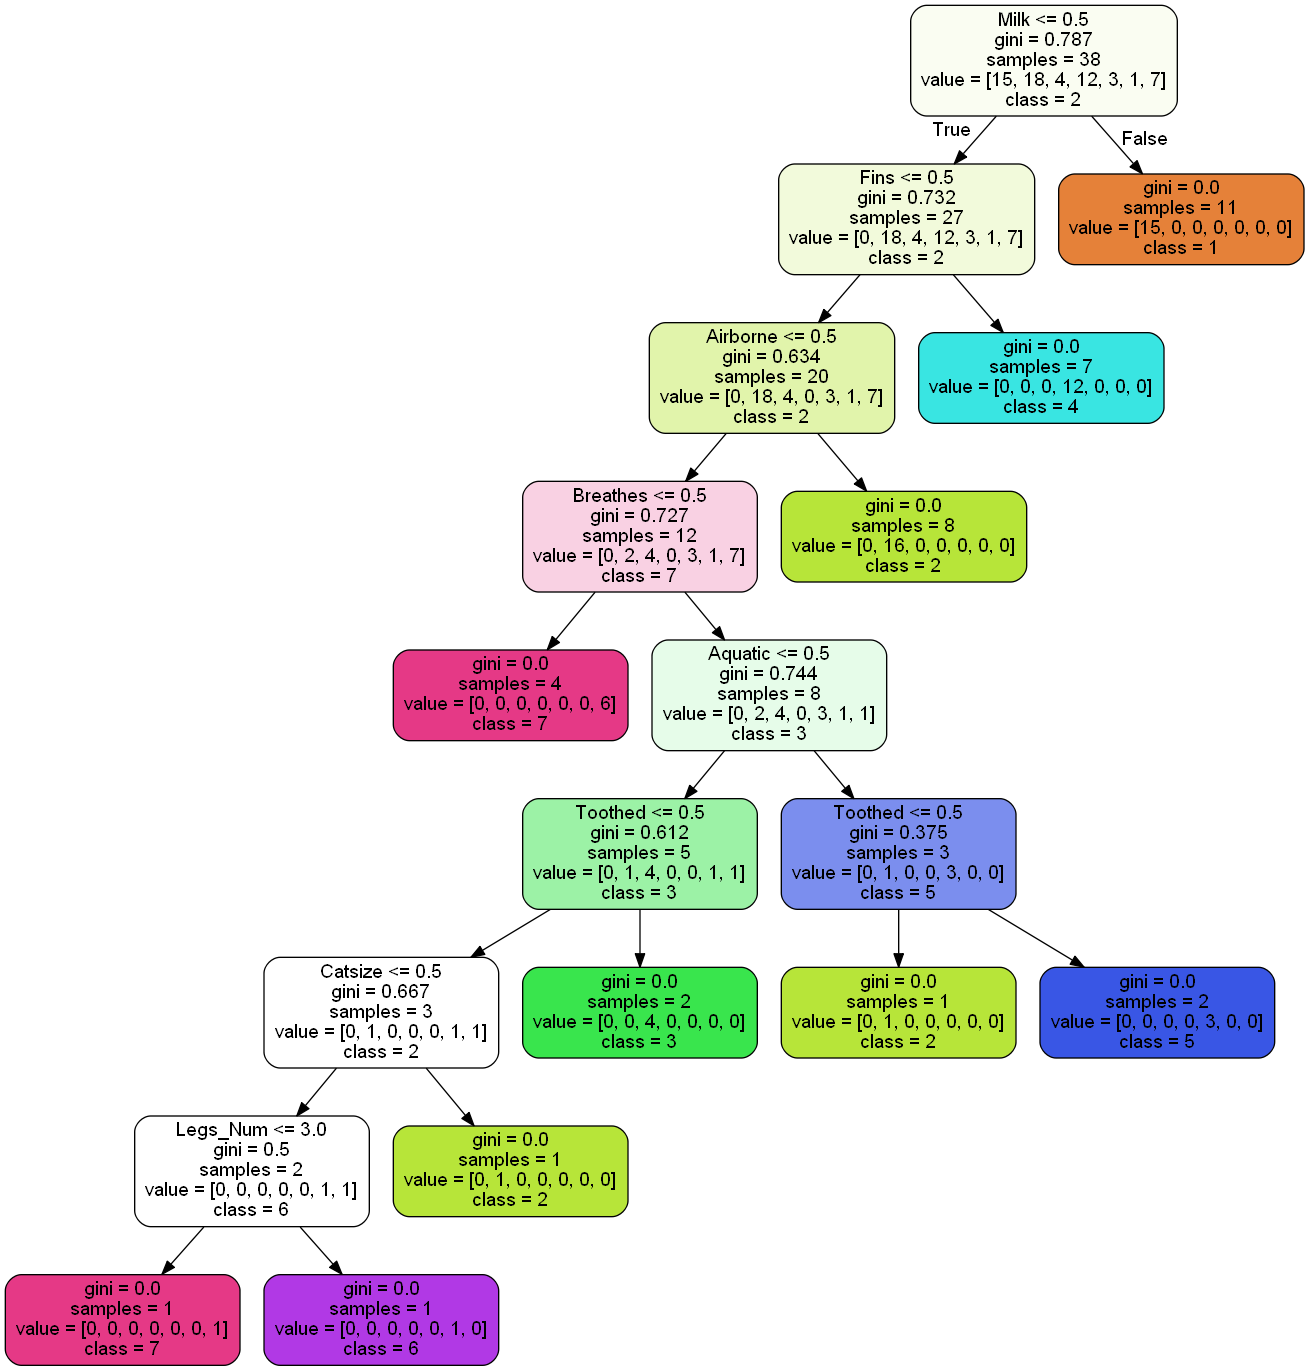

In [25]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=['Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne'
               , 'Aquatic', 'Predetor', 'Toothed', 'Backbone', 'Breathes', 'Venemous' ,
               'Fins', 'Legs_Num', 'Tail', 'Domestic', 'Catsize'],
                          class_names=["1","2","3","4","5","6","7"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM Classification

In [28]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  1.0
Test Accuray :  0.926829268292683


In [29]:
y_pred_svm

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 6, 1, 1, 2, 5, 1, 1, 2, 1, 1, 7, 1, 2, 7],
      dtype=int64)

In [30]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.93        41
   macro avg       0.74      0.83      0.77        41
weighted avg       0.90      0.93      0.91        41



C:\Users\Lydia Afiqah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


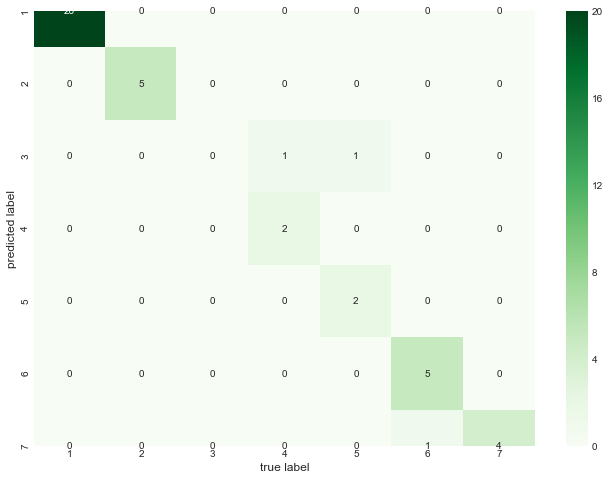

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=7sz4WpkUIIs (SVM)